🔧 Checking required packages...
✅ All packages ready!
⛽📊 EIA Daily Fuel Type Electricity Data Loader
👤 Current User: tructd123
🕐 Current Time: 2025-06-15 05:18:34 UTC
🔗 Testing Daily Fuel Type API connection...
Status Code: 200
✅ API connection successful!
Sample records: 10
Sample record structure:
{
  "period": "2022-05-01",
  "respondent": "AECI",
  "respondent-name": "Associated Electric Cooperative, Inc.",
  "fueltype": "COL",
  "type-name": "Coal",
  "timezone": "Arizona",
  "timezone-description": "Arizona",
  "value": "33349",
  "value-units": "megawatthours"
}

⚠️ Note: Daily fuel type data for 2 years may be substantial
Do you want to:
1. Load all data (recommended)
2. Load limited data (e.g., 15,000 records for testing)
Enter choice (1 or 2): 1

⛽ Loading Daily Fuel Type Electricity Data...
⛽📊 Loading DAILY FUEL TYPE electricity data
📅 Period: 2020-06-01 to 2022-06-01
👤 Current User: tructd123
🕐 Current Time: 2025-06-15 05:18:34 UTC
------------------------------------------

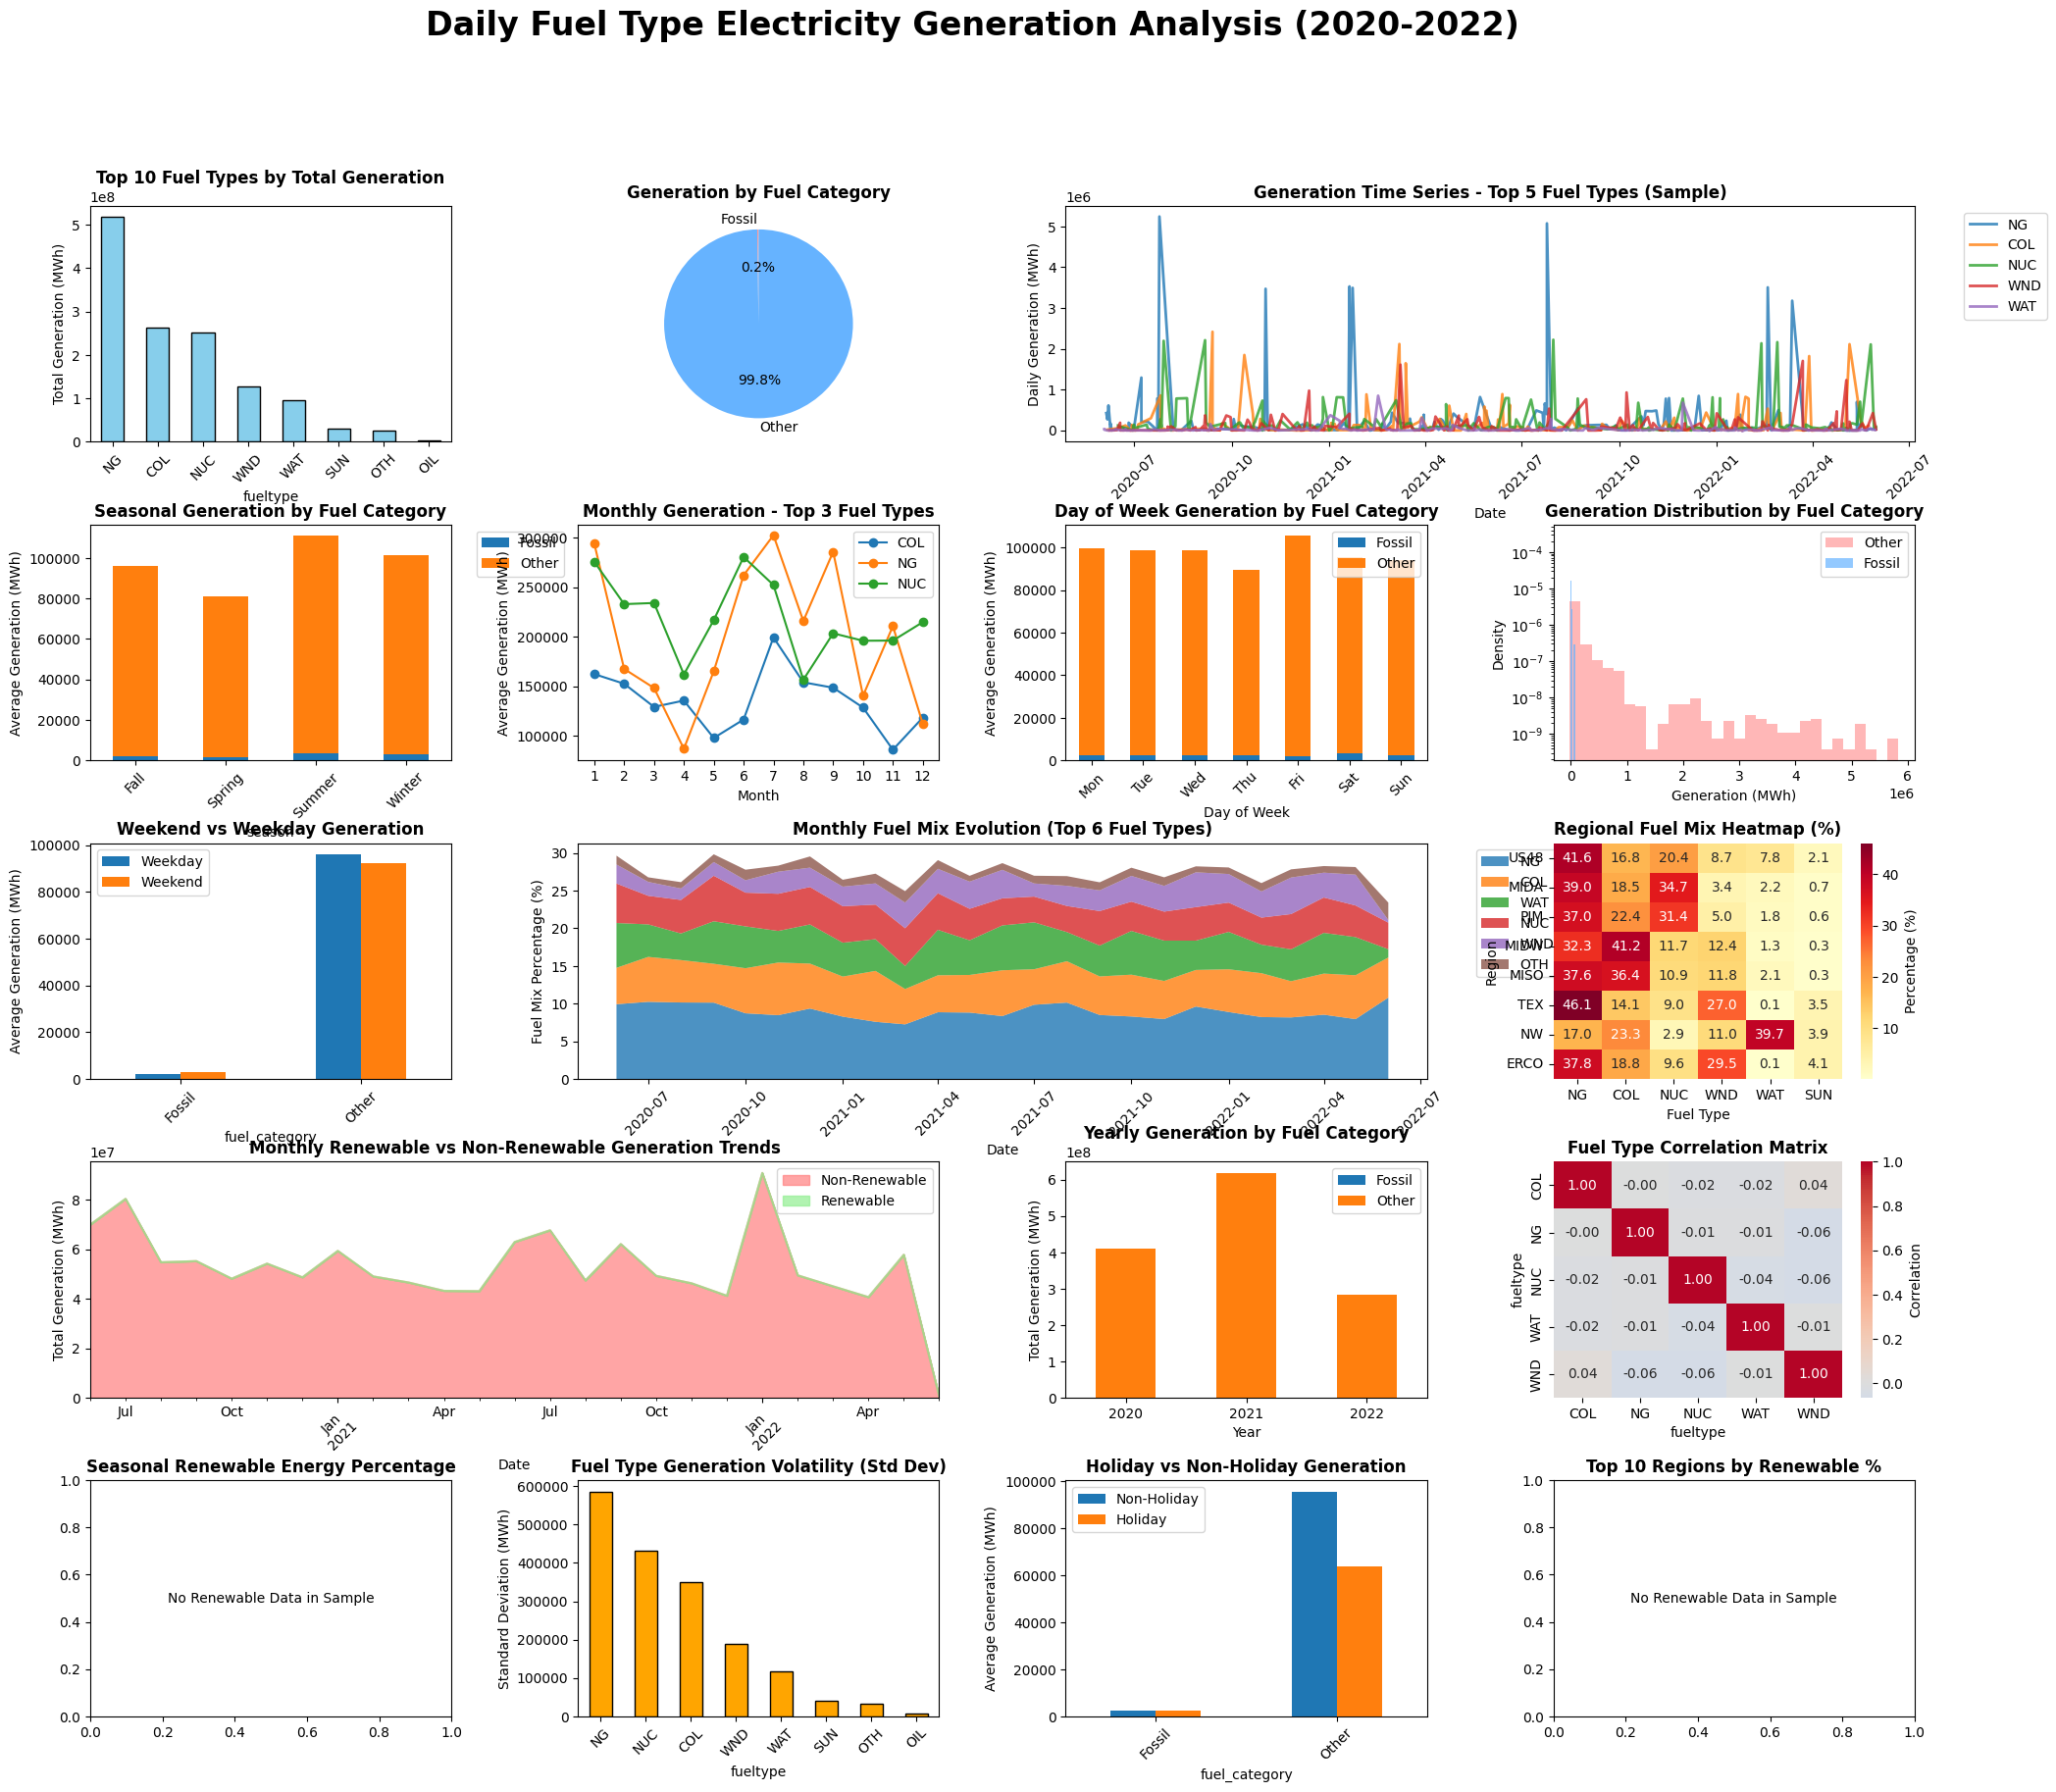


📋 FINAL SUMMARY - FUEL TYPE DATA
✅ Successfully loaded 1,422,869 daily fuel type records
📅 Date range: 2020-06-01 00:00:00 to 2022-06-01 00:00:00
📊 Dataset shape: (1422869, 51)
⏱️ Loading time: 1703.2 seconds
⛽ Fuel types: 8
🔥 Top fuel types by generation:
    1. NG: 43,845,653,157 MWh (36.9%)
    2. COL: 26,388,474,116 MWh (22.2%)
    3. NUC: 23,438,741,809 MWh (19.7%)
    4. WND: 11,753,619,728 MWh (9.9%)
    5. WAT: 7,966,217,937 MWh (6.7%)
🌎 Regions: 78
📊 Fuel categories:
    Fossil: 278,140,396 MWh (0.2%)
    Other: 118,583,822,412 MWh (99.8%)
🌱 Renewable energy: 0.0% of total generation
💾 Memory usage: 1334.92 MB
🔍 Data completeness: 100.00%

🎉 Daily fuel type data loading and analysis completed successfully!
📁 Files saved:
  - Full CSV data file
  - Fuel type summary CSV file
  - Regional fuel mix summary CSV file
  - PNG visualization plots

🚀 This fuel type data is perfect for:
  ⛽ Fuel mix analysis and optimization
  🌱 Renewable energy transition tracking
  📊 Regional energy

In [ ]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

class EIADailyFuelTypeDataLoader:
    def __init__(self, api_key: str):
        self.api_key = api_key
        self.base_url = "https://api.eia.gov/v2"

    def load_daily_fuel_type_data(self,
                                 start_date: str = "2020-06-01",
                                 end_date: str = "2022-06-01",
                                 save_to_csv: bool = True,
                                 max_records: int = None) -> pd.DataFrame:
        """
        Load daily electricity fuel type data using EIA API

        Args:
            start_date: Start date in format "YYYY-MM-DD"
            end_date: End date in format "YYYY-MM-DD"
            save_to_csv: Whether to save data to CSV file
            max_records: Maximum number of records to collect (None = all)
        """

        print(f"⛽📊 Loading DAILY FUEL TYPE electricity data")
        print(f"📅 Period: {start_date} to {end_date}")
        print(f"👤 Current User: tructd123")
        print(f"🕐 Current Time: 2025-06-15 05:18:34 UTC")
        print("-" * 70)

        # Base URL for fuel type data
        base_url = "https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/"

        # Parameters based on the API URL
        params = {
            'api_key': self.api_key,
            'frequency': 'daily',
            'data[0]': 'value',
            'start': start_date,
            'end': end_date,
            'sort[0][column]': 'period',
            'sort[0][direction]': 'asc',
            'offset': 0,
            'length': 5000
        }

        all_data = []
        offset = 0
        batch_count = 0
        start_time = time.time()

        print(f"🚀 Starting fuel type data collection...")

        while True:
            batch_count += 1
            print(f"📥 Fetching batch {batch_count} (offset: {offset:,})...")

            # Update offset parameter
            params['offset'] = offset

            try:
                response = requests.get(base_url, params=params, timeout=60)
                response.raise_for_status()

                print(f"✅ Response status: {response.status_code}")

                data = response.json()

                # Debug: Show response structure for first batch
                if batch_count == 1:
                    print("\n🔍 API Response structure:")
                    if 'response' in data:
                        print(f"  - response keys: {list(data['response'].keys())}")
                        if 'data' in data['response']:
                            print(f"  - data length: {len(data['response']['data'])}")
                            if data['response']['data']:
                                print(f"  - first record keys: {list(data['response']['data'][0].keys())}")
                                print(f"  - sample record:")
                                print(json.dumps(data['response']['data'][0], indent=4))
                    print()

                if 'response' in data and 'data' in data['response']:
                    batch_data = data['response']['data']

                    if not batch_data:  # No more data
                        print("📭 No more data available.")
                        break

                    all_data.extend(batch_data)
                    elapsed_time = time.time() - start_time

                    print(f"✅ Loaded {len(batch_data):,} records | Total: {len(all_data):,} | "
                          f"Time: {elapsed_time:.1f}s | Rate: {len(all_data)/elapsed_time:.1f} rec/s")

                    # Check max records limit
                    if max_records and len(all_data) >= max_records:
                        print(f"🛑 Reached maximum records limit ({max_records:,}). Stopping.")
                        all_data = all_data[:max_records]
                        break

                    # Check if we got less than the limit (last page)
                    if len(batch_data) < 5000:
                        print("📄 Reached last page of data.")
                        break

                    offset += 5000

                    # Rate limiting - be respectful to the API
                    time.sleep(0.3)

                    # Safety limit
                    if batch_count > 1000:  # Higher limit for fuel type data
                        print("⚠️ Reached batch limit (1000). Stopping for safety.")
                        break

                else:
                    print("⚠️ No data in API response")
                    if 'error' in data:
                        print(f"❌ API Error: {data['error']}")
                    elif 'errors' in data:
                        print(f"❌ API Errors: {data['errors']}")
                    break

            except requests.exceptions.RequestException as e:
                print(f"❌ Request error: {e}")
                print("🔄 Retrying in 5 seconds...")
                time.sleep(5)
                continue
            except json.JSONDecodeError as e:
                print(f"❌ JSON decode error: {e}")
                print(f"Response text preview: {response.text[:500]}...")
                break
            except Exception as e:
                print(f"❌ Unexpected error: {e}")
                break

        total_time = time.time() - start_time

        if not all_data:
            print("❌ No data collected!")
            return pd.DataFrame()

        print(f"\n🎉 Data collection completed!")
        print(f"📊 Total records collected: {len(all_data):,}")
        print(f"⏱️ Total time: {total_time:.1f} seconds")
        print(f"📈 Average rate: {len(all_data)/total_time:.1f} records/second")

        # Convert to DataFrame
        df = pd.DataFrame(all_data)

        print(f"📋 Data columns: {df.columns.tolist()}")
        print(f"📏 Data shape: {df.shape}")

        # Convert 'value' to numeric and handle nulls immediately
        if 'value' in df.columns:
            original_nulls = df['value'].isnull().sum()
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            new_nulls = df['value'].isnull().sum()
            print(f"✅ Converted value to numeric. NaN values: {new_nulls:,} (was {original_nulls:,})")

        # Remove null values in critical columns
        initial_rows = len(df)
        df = df.dropna(subset=['value'])
        removed_rows = initial_rows - len(df)
        print(f"✅ Removed {removed_rows:,} rows with null values ({removed_rows/initial_rows*100:.2f}%)")

        # Show sample data
        print(f"\n📋 Sample records:")
        print(df.head())

        # Show unique values for key columns
        if 'respondent' in df.columns:
            respondents = sorted(df['respondent'].unique())
            print(f"\n🌎 Available regions/respondents ({len(respondents)}):")
            for i, resp in enumerate(respondents, 1):
                count = len(df[df['respondent'] == resp])
                avg_value = df[df['respondent'] == resp]['value'].mean() if not df[df['respondent'] == resp].empty else 0
                print(f"  {i:2d}. {resp} ({count:,} records, avg: {avg_value:.2f})")

        if 'fueltype' in df.columns:
            fuel_types = sorted(df['fueltype'].unique())
            print(f"\n⛽ Available fuel types ({len(fuel_types)}):")
            for i, fuel in enumerate(fuel_types, 1):
                count = len(df[df['fueltype'] == fuel])
                avg_value = df[df['fueltype'] == fuel]['value'].mean() if not df[df['fueltype'] == fuel].empty else 0
                total_value = df[df['fueltype'] == fuel]['value'].sum()
                print(f"  {i:2d}. {fuel} ({count:,} records, avg: {avg_value:.2f}, total: {total_value:.2f})")

        if 'type' in df.columns:
            types = sorted(df['type'].unique())
            print(f"\n📈 Available data types: {types}")

        if 'type-name' in df.columns:
            type_names = sorted(df['type-name'].unique())
            print(f"\n📈 Available type names: {type_names}")

        # Data cleaning and preprocessing
        df = self.preprocess_daily_fuel_type_data(df)

        if save_to_csv:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            filename = f"daily_fuel_type_data_{start_date}_to_{end_date}_{timestamp}.csv"

            print(f"\n💾 Saving data to {filename}...")
            df.to_csv(filename, index=False)

            # Save fuel type summary
            summary_filename = f"daily_fuel_type_summary_{timestamp}.csv"
            if 'fueltype' in df.columns:
                summary = df.groupby('fueltype').agg({
                    'value': ['count', 'mean', 'std', 'min', 'max', 'sum']
                }).round(2)
                summary.to_csv(summary_filename)
                print(f"📊 Fuel type summary saved to: {summary_filename}")

            # Save regional fuel mix summary
            if 'respondent' in df.columns and 'fueltype' in df.columns:
                regional_fuel_summary = f"regional_fuel_mix_summary_{timestamp}.csv"
                regional_fuel = df.groupby(['respondent', 'fueltype']).agg({
                    'value': ['count', 'mean', 'sum']
                }).round(2)
                regional_fuel.to_csv(regional_fuel_summary)
                print(f"🌎 Regional fuel mix summary saved to: {regional_fuel_summary}")

            print(f"✅ Full data saved to: {filename}")

        return df

    def preprocess_daily_fuel_type_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """Clean and preprocess the daily fuel type electricity data"""

        print(f"\n🔧 Preprocessing daily fuel type data...")

        print(f"📋 Columns: {df.columns.tolist()}")
        print(f"📊 Shape: {df.shape}")

        # Convert period to datetime
        if 'period' in df.columns:
            print("📅 Converting period to datetime...")
            if not pd.api.types.is_datetime64_any_dtype(df['period']):
                df['period'] = pd.to_datetime(df['period'])
            print(f"✅ Period range: {df['period'].min()} to {df['period'].max()}")

        # Sort data
        sort_columns = ['period']
        if 'respondent' in df.columns and 'fueltype' in df.columns:
            sort_columns = ['respondent', 'fueltype', 'period']
        elif 'respondent' in df.columns:
            sort_columns = ['respondent', 'period']
        elif 'fueltype' in df.columns:
            sort_columns = ['fueltype', 'period']

        print(f"🔄 Sorting data by: {sort_columns}")
        df = df.sort_values(sort_columns)
        df = df.reset_index(drop=True)
        print("✅ Data sorted and reindexed")

        # Add comprehensive time-based features
        print("📅 Adding time-based features...")
        df['year'] = df['period'].dt.year
        df['month'] = df['period'].dt.month
        df['day'] = df['period'].dt.day
        df['day_of_week'] = df['period'].dt.dayofweek
        df['day_of_year'] = df['period'].dt.dayofyear
        df['week_of_year'] = df['period'].dt.isocalendar().week
        df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
        df['quarter'] = df['period'].dt.quarter
        df['month_day'] = df['period'].dt.strftime('%m-%d')

        # Season mapping
        def get_season(month):
            if month in [12, 1, 2]:
                return 'Winter'
            elif month in [3, 4, 5]:
                return 'Spring'
            elif month in [6, 7, 8]:
                return 'Summer'
            else:
                return 'Fall'

        df['season'] = df['month'].apply(get_season)

        # Holiday indicators
        df['date'] = df['period'].dt.date
        if not df.empty:
            min_year = df['year'].min()
            max_year = df['year'].max()
            holidays = self.get_us_holidays(min_year, max_year)
            df['is_holiday'] = df['date'].isin(holidays).astype(int)
        else:
            df['is_holiday'] = 0
            holidays = set()

        # Business day indicator
        df['is_business_day'] = ((df['day_of_week'] < 5) & (df['is_holiday'] == 0)).astype(int)

        print("✅ Added comprehensive time-based features")

        # Add fuel type specific features
        print("⛽ Adding fuel type specific features...")

        # Fuel type categorization
        if 'fueltype' in df.columns:
            def categorize_fuel_type(fuel_type):
                fossil_fuels = ['coal', 'natural gas', 'petroleum', 'oil', 'gas']
                renewables = ['wind', 'solar', 'hydro', 'geothermal', 'biomass', 'wood']
                nuclear = ['nuclear']

                fuel_lower = str(fuel_type).lower()

                if any(ff in fuel_lower for ff in fossil_fuels):
                    return 'Fossil'
                elif any(rn in fuel_lower for rn in renewables):
                    return 'Renewable'
                elif any(nu in fuel_lower for nu in nuclear):
                    return 'Nuclear'
                else:
                    return 'Other'

            df['fuel_category'] = df['fueltype'].apply(categorize_fuel_type)

            # Renewable flag
            df['is_renewable'] = (df['fuel_category'] == 'Renewable').astype(int)
            df['is_fossil'] = (df['fuel_category'] == 'Fossil').astype(int)
            df['is_nuclear'] = (df['fuel_category'] == 'Nuclear').astype(int)

        # Add lag features for fuel type forecasting
        print("🔄 Computing lag and rolling features...")

        if not df.empty and 'value' in df.columns:
            if 'respondent' in df.columns and 'fueltype' in df.columns:
                print("  - Computing features by region and fuel type...")
                groupby_cols = ['respondent', 'fueltype']

                # Lag features
                df['generation_lag_1d'] = df.groupby(groupby_cols)['value'].shift(1)
                df['generation_lag_7d'] = df.groupby(groupby_cols)['value'].shift(7)
                df['generation_lag_30d'] = df.groupby(groupby_cols)['value'].shift(30)
                df['generation_lag_365d'] = df.groupby(groupby_cols)['value'].shift(365)

                # Rolling averages
                print("    - Computing rolling averages...")
                df['generation_ma_7d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=7, min_periods=1).mean()
                )
                df['generation_ma_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).mean()
                )
                df['generation_ma_90d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=90, min_periods=1).mean()
                )

                # Trend features
                df['generation_trend_7d'] = df['value'] - df['generation_lag_7d']
                df['generation_trend_30d'] = df['value'] - df['generation_lag_30d']
                df['generation_growth_rate_7d'] = ((df['value'] - df['generation_lag_7d']) /
                                                  (df['generation_lag_7d'] + 1e-6) * 100).fillna(0)
                df['generation_growth_rate_30d'] = ((df['value'] - df['generation_lag_30d']) /
                                                   (df['generation_lag_30d'] + 1e-6) * 100).fillna(0)

                # Year-over-year comparison
                df['generation_yoy_change'] = df['value'] - df['generation_lag_365d']
                df['generation_yoy_growth'] = ((df['value'] - df['generation_lag_365d']) /
                                              (df['generation_lag_365d'] + 1e-6) * 100).fillna(0)

                # Rolling statistics
                df['generation_std_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).std()
                )
                df['generation_max_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).max()
                )
                df['generation_min_30d'] = df.groupby(groupby_cols)['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).min()
                )

                # Volatility measures
                df['generation_volatility_30d'] = df['generation_std_30d'] / (df['generation_ma_30d'] + 1e-6)

                # Fuel mix features (percentage of total generation)
                print("    - Computing fuel mix percentages...")
                df['total_generation_by_region_date'] = df.groupby(['respondent', 'period'])['value'].transform('sum')
                df['fuel_mix_percentage'] = (df['value'] / (df['total_generation_by_region_date'] + 1e-6) * 100).fillna(0)

            elif 'fueltype' in df.columns:
                print("  - Computing features by fuel type...")
                df['generation_lag_1d'] = df.groupby('fueltype')['value'].shift(1)
                df['generation_lag_7d'] = df.groupby('fueltype')['value'].shift(7)
                df['generation_lag_30d'] = df.groupby('fueltype')['value'].shift(30)

                df['generation_ma_7d'] = df.groupby('fueltype')['value'].transform(
                    lambda x: x.rolling(window=7, min_periods=1).mean()
                )
                df['generation_ma_30d'] = df.groupby('fueltype')['value'].transform(
                    lambda x: x.rolling(window=30, min_periods=1).mean()
                )

                df['generation_trend_7d'] = df['value'] - df['generation_lag_7d']
                df['generation_growth_rate_7d'] = ((df['value'] - df['generation_lag_7d']) /
                                                  (df['generation_lag_7d'] + 1e-6) * 100).fillna(0)

                # Fuel mix features
                df['total_generation_by_date'] = df.groupby('period')['value'].transform('sum')
                df['fuel_mix_percentage'] = (df['value'] / (df['total_generation_by_date'] + 1e-6) * 100).fillna(0)

        print("✅ Added lag and rolling features")

        # Add cyclical encoding for time features
        print("🔄 Adding cyclical time encodings...")
        if not df.empty and 'period' in df.columns and pd.api.types.is_datetime64_any_dtype(df['period']):
            df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
            df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
            df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
            df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
            df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
            df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)
            print("✅ Added cyclical encodings")

        print(f"\n✅ Preprocessing completed!")
        print(f"📊 Final shape: {df.shape}")
        print(f"📋 Final columns ({len(df.columns)}): {df.columns.tolist()}")

        # Memory usage info
        memory_usage = df.memory_usage(deep=True).sum() / 1024**2  # MB
        print(f"💾 Memory usage: {memory_usage:.2f} MB")

        return df

    def get_us_holidays(self, start_year: int, end_year: int) -> set:
        """Get basic US holidays for the given year range"""
        holidays = set()

        for year in range(start_year, end_year + 1):
            # Fixed holidays
            holidays.add(datetime(year, 1, 1).date())   # New Year's Day
            holidays.add(datetime(year, 7, 4).date())   # Independence Day
            holidays.add(datetime(year, 11, 11).date()) # Veterans Day
            holidays.add(datetime(year, 12, 25).date()) # Christmas Day

            # Thanksgiving (4th Thursday in November)
            nov_first = datetime(year, 11, 1)
            first_thursday = nov_first + timedelta(days=(3 - nov_first.weekday()) % 7)
            thanksgiving = first_thursday + timedelta(days=21)  # 4th Thursday
            holidays.add(thanksgiving.date())

            # Memorial Day (last Monday in May)
            may_last = datetime(year, 5, 31)
            while may_last.weekday() != 0:  # Find last Monday
                may_last -= timedelta(days=1)
            holidays.add(may_last.date())

            # Labor Day (first Monday in September)
            sep_first = datetime(year, 9, 1)
            first_monday = sep_first + timedelta(days=(7 - sep_first.weekday()) % 7)
            holidays.add(first_monday.date())

        return holidays

    def explore_daily_fuel_type_data(self, df: pd.DataFrame):
        """Explore the loaded daily fuel type dataset"""

        print("\n" + "="*80)
        print("⛽📊 DAILY FUEL TYPE ELECTRICITY DATA EXPLORATION")
        print("="*80)

        if df.empty:
            print("🔍 Dataset is empty. No exploration to perform.")
            return

        # Basic info
        print(f"📈 Dataset shape: {df.shape}")
        print(f"📅 Date range: {df['period'].min()} to {df['period'].max()}")
        print(f"📆 Total days of data: {df['period'].nunique():,}")
        print(f"📍 Missing values in 'value': {df['value'].isnull().sum():,}")

        # Time span analysis
        total_days = (df['period'].max() - df['period'].min()).days
        data_completeness = df['period'].nunique() / total_days * 100 if total_days > 0 else 0
        print(f"⏱️ Time span: {total_days:,} days ({total_days/365:.1f} years)")
        print(f"📊 Data completeness: {data_completeness:.2f}%")

        # Fuel type analysis
        if 'fueltype' in df.columns:
            fuel_types = df['fueltype'].unique()
            print(f"\n⛽ Fuel Types Available ({len(fuel_types)}):")
            fuel_stats = df.groupby('fueltype').agg({
                'value': ['count', 'sum', 'mean', 'std', 'min', 'max']
            }).round(2)
            fuel_stats.columns = ['Records', 'Total_MWh', 'Mean_MWh', 'Std_MWh', 'Min_MWh', 'Max_MWh']
            fuel_stats = fuel_stats.sort_values('Total_MWh', ascending=False)
            print(fuel_stats)

        # Regional analysis
        if 'respondent' in df.columns:
            regions = df['respondent'].unique()
            print(f"\n🌎 Regions/Respondents Available ({len(regions)}):")
            regional_stats = df.groupby('respondent').agg({
                'value': ['count', 'sum', 'mean']
            }).round(2)
            regional_stats.columns = ['Records', 'Total_MWh', 'Mean_MWh']
            regional_stats = regional_stats.sort_values('Total_MWh', ascending=False)
            print(regional_stats.head(10))

        # Fuel category analysis
        if 'fuel_category' in df.columns:
            print(f"\n📊 Fuel Category Analysis:")
            category_stats = df.groupby('fuel_category').agg({
                'value': ['count', 'sum', 'mean']
            }).round(2)
            category_stats.columns = ['Records', 'Total_MWh', 'Mean_MWh']
            category_stats = category_stats.sort_values('Total_MWh', ascending=False)
            print(category_stats)

        # Generation statistics
        print(f"\n📊 Overall Generation Statistics (MWh):")
        print(f"  Total Records: {len(df):,}")
        print(f"  Mean Generation: {df['value'].mean():,.2f}")
        print(f"  Std Generation: {df['value'].std():,.2f}")
        print(f"  Min Generation: {df['value'].min():,.2f}")
        print(f"  Max Generation: {df['value'].max():,.2f}")
        print(f"  Total Generation: {df['value'].sum():,.2f}")

        # Seasonal patterns by fuel type
        if 'season' in df.columns and 'fueltype' in df.columns:
            print(f"\n📅 Seasonal Patterns by Fuel Type (Top 5 by total generation):")
            top_fuels = df.groupby('fueltype')['value'].sum().nlargest(5).index
            seasonal_fuel_stats = df[df['fueltype'].isin(top_fuels)].groupby(['season', 'fueltype'])['value'].mean().unstack(fill_value=0).round(2)
            print(seasonal_fuel_stats)

        # Monthly patterns
        if 'fueltype' in df.columns:
            print(f"\n📅 Monthly Generation Patterns (Top 5 Fuel Types):")
            top_fuels = df.groupby('fueltype')['value'].sum().nlargest(5).index
            monthly_fuel_stats = df[df['fueltype'].isin(top_fuels)].groupby(['month', 'fueltype'])['value'].mean().unstack(fill_value=0).round(2)
            print(monthly_fuel_stats)

        # Fuel mix analysis
        if 'fuel_mix_percentage' in df.columns:
            print(f"\n🔄 Average Fuel Mix Percentage:")
            avg_fuel_mix = df.groupby('fueltype')['fuel_mix_percentage'].mean().sort_values(ascending=False)
            for fuel_type, percentage in avg_fuel_mix.head(10).items():
                print(f"  {fuel_type}: {percentage:.2f}%")

        # Weekend vs weekday patterns by fuel category
        if 'is_weekend' in df.columns and 'fuel_category' in df.columns:
            print(f"\n📅 Weekend vs Weekday Patterns by Fuel Category:")
            weekend_weekday_stats = df.groupby(['fuel_category', 'is_weekend'])['value'].mean().unstack(fill_value=0)
            weekend_weekday_stats.columns = ['Weekday', 'Weekend']
            weekend_weekday_stats['Weekend/Weekday Ratio'] = weekend_weekday_stats['Weekend'] / weekend_weekday_stats['Weekday']
            print(weekend_weekday_stats.round(3))

        # Top fuel types by total generation
        if 'fueltype' in df.columns:
            print(f"\n🏆 Top 10 Fuel Types by Total Generation:")
            top_fuels = df.groupby('fueltype')['value'].sum().sort_values(ascending=False).head(10)
            for i, (fuel_type, total) in enumerate(top_fuels.items(), 1):
                percentage = (total / df['value'].sum()) * 100
                print(f"  {i:2d}. {fuel_type}: {total:,.2f} MWh ({percentage:.2f}%)")

        # Data quality assessment
        print(f"\n🔍 Data Quality Assessment:")
        print(f"  Zero values: {(df['value'] == 0).sum():,} ({(df['value'] == 0).mean()*100:.2f}%)")
        print(f"  Negative values: {(df['value'] < 0).sum():,} ({(df['value'] < 0).mean()*100:.2f}%)")

        # Renewable vs non-renewable split
        if 'is_renewable' in df.columns:
            renewable_total = df[df['is_renewable'] == 1]['value'].sum()
            total_generation = df['value'].sum()
            renewable_percentage = (renewable_total / total_generation) * 100
            print(f"\n🌱 Renewable Energy Analysis:")
            print(f"  Renewable Generation: {renewable_total:,.2f} MWh ({renewable_percentage:.2f}%)")
            print(f"  Non-Renewable Generation: {total_generation - renewable_total:,.2f} MWh ({100 - renewable_percentage:.2f}%)")

    def create_comprehensive_fuel_type_visualizations(self, df: pd.DataFrame, save_plots: bool = True):
        """Create comprehensive visualizations for daily fuel type data"""

        print(f"\n📊 Creating comprehensive fuel type visualizations...")

        # Use sample for plotting if dataset is too large
        sample_size = min(15000, len(df))
        if len(df) > sample_size:
            plot_df = df.sample(n=sample_size, random_state=42)
            print(f"📊 Using sample of {sample_size:,} records for plotting")
        else:
            plot_df = df

        plt.style.use('default')
        fig = plt.figure(figsize=(24, 20))

        # Main title
        fig.suptitle('Daily Fuel Type Electricity Generation Analysis (2020-2022)',
                    fontsize=24, fontweight='bold', y=0.98)

        # Define grid layout
        gs = fig.add_gridspec(5, 4, hspace=0.35, wspace=0.35)

        # 1. Top fuel types by total generation
        ax1 = fig.add_subplot(gs[0, 0])
        if 'fueltype' in plot_df.columns:
            fuel_totals = plot_df.groupby('fueltype')['value'].sum().sort_values(ascending=False).head(10)
            fuel_totals.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
            ax1.set_title('Top 10 Fuel Types by Total Generation', fontweight='bold', fontsize=12)
            ax1.set_ylabel('Total Generation (MWh)')
            ax1.tick_params(axis='x', rotation=45)

        # 2. Fuel category pie chart
        ax2 = fig.add_subplot(gs[0, 1])
        if 'fuel_category' in plot_df.columns:
            category_totals = plot_df.groupby('fuel_category')['value'].sum()
            colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
            ax2.pie(category_totals.values, labels=category_totals.index, autopct='%1.1f%%',
                   colors=colors, startangle=90)
            ax2.set_title('Generation by Fuel Category', fontweight='bold', fontsize=12)

        # 3. Time series of top 5 fuel types
        ax3 = fig.add_subplot(gs[0, 2:])
        if 'fueltype' in plot_df.columns:
            top_5_fuels = plot_df.groupby('fueltype')['value'].sum().nlargest(5).index
            for i, fuel in enumerate(top_5_fuels):
                fuel_data = plot_df[plot_df['fueltype'] == fuel]
                # Sample for cleaner visualization
                if len(fuel_data) > 200:
                    fuel_data = fuel_data.sample(n=200, random_state=42).sort_values('period')
                ax3.plot(fuel_data['period'], fuel_data['value'], label=fuel, alpha=0.8, linewidth=2)

            ax3.set_title('Generation Time Series - Top 5 Fuel Types (Sample)', fontweight='bold', fontsize=12)
            ax3.set_xlabel('Date')
            ax3.set_ylabel('Daily Generation (MWh)')
            ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax3.tick_params(axis='x', rotation=45)

        # 4. Seasonal patterns by fuel category
        ax4 = fig.add_subplot(gs[1, 0])
        if 'season' in plot_df.columns and 'fuel_category' in plot_df.columns:
            seasonal_category = plot_df.groupby(['season', 'fuel_category'])['value'].mean().unstack(fill_value=0)
            seasonal_category.plot(kind='bar', ax=ax4, stacked=True)
            ax4.set_title('Seasonal Generation by Fuel Category', fontweight='bold', fontsize=12)
            ax4.set_ylabel('Average Generation (MWh)')
            ax4.tick_params(axis='x', rotation=45)
            ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # 5. Monthly patterns for top fuel types
        ax5 = fig.add_subplot(gs[1, 1])
        if 'month' in plot_df.columns and 'fueltype' in plot_df.columns:
            top_3_fuels = plot_df.groupby('fueltype')['value'].sum().nlargest(3).index
            monthly_fuel = plot_df[plot_df['fueltype'].isin(top_3_fuels)].groupby(['month', 'fueltype'])['value'].mean().unstack(fill_value=0)
            monthly_fuel.plot(kind='line', ax=ax5, marker='o')
            ax5.set_title('Monthly Generation - Top 3 Fuel Types', fontweight='bold', fontsize=12)
            ax5.set_xlabel('Month')
            ax5.set_ylabel('Average Generation (MWh)')
            ax5.set_xticks(range(1, 13))
            ax5.legend()

        # 6. Day of week patterns by fuel category
        ax6 = fig.add_subplot(gs[1, 2])
        if 'day_of_week' in plot_df.columns and 'fuel_category' in plot_df.columns:
            dow_category = plot_df.groupby(['day_of_week', 'fuel_category'])['value'].mean().unstack(fill_value=0)
            dow_category.plot(kind='bar', ax=ax6, stacked=True)
            ax6.set_title('Day of Week Generation by Fuel Category', fontweight='bold', fontsize=12)
            ax6.set_xlabel('Day of Week')
            ax6.set_ylabel('Average Generation (MWh)')
            day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            ax6.set_xticklabels(day_names, rotation=45)
            ax6.legend()

        # 7. Generation distribution by fuel category
        ax7 = fig.add_subplot(gs[1, 3])
        if 'fuel_category' in plot_df.columns:
            categories = plot_df['fuel_category'].unique()
            colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
            for i, category in enumerate(categories):
                category_data = plot_df[plot_df['fuel_category'] == category]['value']
                ax7.hist(category_data, bins=30, alpha=0.7, label=category,
                        color=colors[i % len(colors)], density=True)
            ax7.set_title('Generation Distribution by Fuel Category', fontweight='bold', fontsize=12)
            ax7.set_xlabel('Generation (MWh)')
            ax7.set_ylabel('Density')
            ax7.legend()
            ax7.set_yscale('log')

        # 8. Weekend vs weekday comparison by fuel category
        ax8 = fig.add_subplot(gs[2, 0])
        if 'is_weekend' in plot_df.columns and 'fuel_category' in plot_df.columns:
            weekend_comparison = plot_df.groupby(['fuel_category', 'is_weekend'])['value'].mean().unstack(fill_value=0)
            weekend_comparison.columns = ['Weekday', 'Weekend']
            weekend_comparison.plot(kind='bar', ax=ax8)
            ax8.set_title('Weekend vs Weekday Generation', fontweight='bold', fontsize=12)
            ax8.set_ylabel('Average Generation (MWh)')
            ax8.tick_params(axis='x', rotation=45)
            ax8.legend()

        # 9. Fuel mix percentage over time (stacked area chart)
        ax9 = fig.add_subplot(gs[2, 1:3])
        if 'fuel_mix_percentage' in plot_df.columns and 'fueltype' in plot_df.columns:
            # Create monthly fuel mix percentages
            plot_df['year_month'] = plot_df['period'].dt.to_period('M')
            monthly_mix = plot_df.groupby(['year_month', 'fueltype'])['fuel_mix_percentage'].mean().unstack(fill_value=0)

            # Select top 6 fuel types by average percentage
            top_fuels = monthly_mix.mean().nlargest(6).index
            monthly_mix_top = monthly_mix[top_fuels]
            monthly_mix_top.index = monthly_mix_top.index.to_timestamp()

            ax9.stackplot(monthly_mix_top.index, *[monthly_mix_top[col] for col in monthly_mix_top.columns],
                         labels=monthly_mix_top.columns, alpha=0.8)
            ax9.set_title('Monthly Fuel Mix Evolution (Top 6 Fuel Types)', fontweight='bold', fontsize=12)
            ax9.set_xlabel('Date')
            ax9.set_ylabel('Fuel Mix Percentage (%)')
            ax9.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax9.tick_params(axis='x', rotation=45)

        # 10. Regional fuel mix heatmap
        ax10 = fig.add_subplot(gs[2, 3])
        if 'respondent' in plot_df.columns and 'fueltype' in plot_df.columns:
            # Create regional fuel mix
            regional_fuel_mix = plot_df.groupby(['respondent', 'fueltype'])['value'].sum().unstack(fill_value=0)

            # Normalize to percentages
            regional_fuel_mix_pct = regional_fuel_mix.div(regional_fuel_mix.sum(axis=1), axis=0) * 100

            # Select top regions and fuel types
            top_regions = plot_df.groupby('respondent')['value'].sum().nlargest(8).index
            top_fuels = plot_df.groupby('fueltype')['value'].sum().nlargest(6).index

            heatmap_data = regional_fuel_mix_pct.loc[top_regions, top_fuels]

            sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax10, cbar_kws={'label': 'Percentage (%)'})
            ax10.set_title('Regional Fuel Mix Heatmap (%)', fontweight='bold', fontsize=12)
            ax10.set_xlabel('Fuel Type')
            ax10.set_ylabel('Region')

        # 11. Renewable vs non-renewable trends
        ax11 = fig.add_subplot(gs[3, 0:2])
        if 'is_renewable' in plot_df.columns and 'period' in plot_df.columns:
            # Monthly renewable vs non-renewable
            plot_df['year_month'] = plot_df['period'].dt.to_period('M')
            renewable_trends = plot_df.groupby(['year_month', 'is_renewable'])['value'].sum().unstack(fill_value=0)

            # Ensure both 0 and 1 columns exist even if one is missing in the sample
            # This is the fix for the ValueError
            expected_cols = [0, 1]
            for col in expected_cols:
                if col not in renewable_trends.columns:
                    renewable_trends[col] = 0

            # Reorder columns and rename
            renewable_trends = renewable_trends[expected_cols]
            renewable_trends.columns = ['Non-Renewable', 'Renewable']

            renewable_trends.index = renewable_trends.index.to_timestamp()

            renewable_trends.plot(kind='area', ax=ax11, stacked=True, alpha=0.7, color=['#ff7f7f', '#90EE90'])
            ax11.set_title('Monthly Renewable vs Non-Renewable Generation Trends', fontweight='bold', fontsize=12)
            ax11.set_xlabel('Date')
            ax11.set_ylabel('Total Generation (MWh)')
            ax11.legend()
            ax11.tick_params(axis='x', rotation=45)

        # 12. Year-over-year comparison by fuel category
        ax12 = fig.add_subplot(gs[3, 2])
        if 'year' in plot_df.columns and 'fuel_category' in plot_df.columns:
            yearly_category = plot_df.groupby(['year', 'fuel_category'])['value'].sum().unstack(fill_value=0)
            yearly_category.plot(kind='bar', ax=ax12, stacked=True)
            ax12.set_title('Yearly Generation by Fuel Category', fontweight='bold', fontsize=12)
            ax12.set_xlabel('Year')
            ax12.set_ylabel('Total Generation (MWh)')
            ax12.tick_params(axis='x', rotation=0)
            ax12.legend()

        # 13. Correlation heatmap of top fuel types
        ax13 = fig.add_subplot(gs[3, 3])
        if 'fueltype' in plot_df.columns and 'period' in plot_df.columns:
            # Create pivot table for correlation analysis
            top_5_fuels = plot_df.groupby('fueltype')['value'].sum().nlargest(5).index
            fuel_pivot = plot_df[plot_df['fueltype'].isin(top_5_fuels)].pivot_table(
                index='period', columns='fueltype', values='value', fill_value=0
            )

            correlation_matrix = fuel_pivot.corr()
            sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                       center=0, ax=ax13, cbar_kws={'label': 'Correlation'})
            ax13.set_title('Fuel Type Correlation Matrix', fontweight='bold', fontsize=12)

        # 14. Seasonal renewable percentage
        ax14 = fig.add_subplot(gs[4, 0])
        if 'season' in plot_df.columns and 'is_renewable' in plot_df.columns:
            seasonal_renewable = plot_df.groupby(['season', 'is_renewable'])['value'].sum().unstack(fill_value=0)
            seasonal_renewable_pct = seasonal_renewable.div(seasonal_renewable.sum(axis=1), axis=0) * 100

            # Ensure column 1 exists before plotting
            if 1 in seasonal_renewable_pct.columns:
                 seasonal_renewable_pct[1].plot(kind='bar', ax=ax14, color='lightgreen', edgecolor='black')
                 ax14.set_title('Seasonal Renewable Energy Percentage', fontweight='bold', fontsize=12)
                 ax14.set_ylabel('Renewable Percentage (%)')
                 ax14.tick_params(axis='x', rotation=45)
            else:
                 # Handle case where no renewable data in sample
                 ax14.text(0.5, 0.5, 'No Renewable Data in Sample', horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
                 ax14.set_title('Seasonal Renewable Energy Percentage', fontweight='bold', fontsize=12)


        # 15. Fuel type volatility comparison
        ax15 = fig.add_subplot(gs[4, 1])
        if 'fueltype' in plot_df.columns:
            fuel_volatility = plot_df.groupby('fueltype')['value'].std().sort_values(ascending=False).head(10)
            fuel_volatility.plot(kind='bar', ax=ax15, color='orange', edgecolor='black')
            ax15.set_title('Fuel Type Generation Volatility (Std Dev)', fontweight='bold', fontsize=12)
            ax15.set_ylabel('Standard Deviation (MWh)')
            ax15.tick_params(axis='x', rotation=45)

        # 16. Holiday vs non-holiday generation patterns
        ax16 = fig.add_subplot(gs[4, 2])
        if 'is_holiday' in plot_df.columns and 'fuel_category' in plot_df.columns:
            holiday_comparison = plot_df.groupby(['fuel_category', 'is_holiday'])['value'].mean().unstack(fill_value=0)
            holiday_comparison.columns = ['Non-Holiday', 'Holiday']
            holiday_comparison.plot(kind='bar', ax=ax16)
            ax16.set_title('Holiday vs Non-Holiday Generation', fontweight='bold', fontsize=12)
            ax16.set_ylabel('Average Generation (MWh)')
            ax16.tick_params(axis='x', rotation=45)
            ax16.legend()

        # 17. Top regions by renewable percentage
        ax17 = fig.add_subplot(gs[4, 3])
        if 'respondent' in plot_df.columns and 'is_renewable' in plot_df.columns:
            regional_renewable = plot_df.groupby(['respondent', 'is_renewable'])['value'].sum().unstack(fill_value=0)
            regional_renewable_pct = regional_renewable.div(regional_renewable.sum(axis=1), axis=0) * 100
            if 1 in regional_renewable_pct.columns:
                top_renewable_regions = regional_renewable_pct[1].nlargest(10)
                top_renewable_regions.plot(kind='bar', ax=ax17, color='lightblue', edgecolor='black')
                ax17.set_title('Top 10 Regions by Renewable %', fontweight='bold', fontsize=12)
                ax17.set_ylabel('Renewable Percentage (%)')
                ax17.tick_params(axis='x', rotation=45)
            else:
                 ax17.text(0.5, 0.5, 'No Renewable Data in Sample', horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
                 ax17.set_title('Top 10 Regions by Renewable %', fontweight='bold', fontsize=12)


        plt.tight_layout()

        if save_plots:
            plot_filename = f"daily_fuel_type_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            print(f"📊 Comprehensive fuel type analysis plots saved to {plot_filename}")

        plt.show()

def test_daily_fuel_type_api_connection(api_key: str):
    """Test the daily fuel type API connection with a small request"""

    print("🔗 Testing Daily Fuel Type API connection...")

    url = "https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/"
    params = {
        'api_key': api_key,
        'frequency': 'daily',
        'data[0]': 'value',
        'start': '2022-05-01',
        'end': '2022-05-05',
        'sort[0][column]': 'period',
        'sort[0][direction]': 'asc',
        'offset': 0,
        'length': 10
    }

    try:
        response = requests.get(url, params=params, timeout=30)
        print(f"Status Code: {response.status_code}")

        if response.status_code == 200:
            data = response.json()
            if 'response' in data and 'data' in data['response']:
                print(f"✅ API connection successful!")
                print(f"Sample records: {len(data['response']['data'])}")
                if data['response']['data']:
                    print("Sample record structure:")
                    print(json.dumps(data['response']['data'][0], indent=2))
                return True
            else:
                print(f"⚠️ Unexpected response structure: {data}")
                return False
        else:
            print(f"❌ API request failed: {response.status_code}")
            print(f"Response: {response.text}")
            return False

    except Exception as e:
        print(f"❌ Connection error: {e}")
        return False

def main():
    """Main function to load and explore daily fuel type electricity data"""

    print("⛽📊 EIA Daily Fuel Type Electricity Data Loader")
    print("=" * 70)
    print(f"👤 Current User: tructd123")
    print(f"🕐 Current Time: 2025-06-15 05:18:34 UTC")
    print("=" * 70)

    EIA_API_KEY = "y0ABMMWGPawhO558ieql8MIBtWZafdiAncVEE9BL"

    if not EIA_API_KEY or EIA_API_KEY.lower() in ['your_eia_api_key_here', 'test', '']:
        print("❌ Please provide a valid EIA API key!")
        print("🌐 You can get one from: https://www.eia.gov/opendata/register.php")
        return None

    # Test API connection first
    if not test_daily_fuel_type_api_connection(EIA_API_KEY):
        print("❌ API connection test failed. Please check your API key.")
        return None

    # Ask about data limits
    print(f"\n⚠️ Note: Daily fuel type data for 2 years may be substantial")
    print(f"Do you want to:")
    print(f"1. Load all data (recommended)")
    print(f"2. Load limited data (e.g., 15,000 records for testing)")
    choice = input("Enter choice (1 or 2): ").strip()

    max_records = None
    if choice == "2":
        try:
            max_records = int(input("Enter maximum records to load (e.g., 15000): "))
        except ValueError:
            max_records = 15000
            print(f"Using default: {max_records:,} records")

    # Initialize data loader
    loader = EIADailyFuelTypeDataLoader(EIA_API_KEY)

    print(f"\n⛽ Loading Daily Fuel Type Electricity Data...")
    print("=" * 70)

    # Load daily fuel type data
    start_time = time.time()

    fuel_type_data = loader.load_daily_fuel_type_data(
        start_date="2020-06-01",
        end_date="2022-06-01",
        save_to_csv=True,
        max_records=max_records
    )

    load_time = time.time() - start_time

    if fuel_type_data.empty:
        print("❌ No data loaded. Please check your API key and parameters.")
        return None

    # Explore the dataset
    print(f"\n📊 Exploring the fuel type dataset...")
    loader.explore_daily_fuel_type_data(fuel_type_data)

    # Create comprehensive visualizations
    print(f"\n📊 Creating fuel type visualizations...")
    loader.create_comprehensive_fuel_type_visualizations(fuel_type_data, save_plots=True)

    # Final summary
    print("\n" + "="*70)
    print("📋 FINAL SUMMARY - FUEL TYPE DATA")
    print("="*70)
    print(f"✅ Successfully loaded {len(fuel_type_data):,} daily fuel type records")
    print(f"📅 Date range: {fuel_type_data['period'].min()} to {fuel_type_data['period'].max()}")
    print(f"📊 Dataset shape: {fuel_type_data.shape}")
    print(f"⏱️ Loading time: {load_time:.1f} seconds")

    if 'fueltype' in fuel_type_data.columns:
        print(f"⛽ Fuel types: {fuel_type_data['fueltype'].nunique()}")
        print(f"🔥 Top fuel types by generation:")
        top_fuels = fuel_type_data.groupby('fueltype')['value'].sum().nlargest(5)
        for i, (fuel, total) in enumerate(top_fuels.items(), 1):
            percentage = (total / fuel_type_data['value'].sum()) * 100
            print(f"    {i}. {fuel}: {total:,.0f} MWh ({percentage:.1f}%)")

    if 'respondent' in fuel_type_data.columns:
        print(f"🌎 Regions: {fuel_type_data['respondent'].nunique()}")

    if 'fuel_category' in fuel_type_data.columns:
        print(f"📊 Fuel categories:")
        category_totals = fuel_type_data.groupby('fuel_category')['value'].sum()
        for category, total in category_totals.items():
            percentage = (total / fuel_type_data['value'].sum()) * 100
            print(f"    {category}: {total:,.0f} MWh ({percentage:.1f}%)")

    # Show renewable percentage
    if 'is_renewable' in fuel_type_data.columns:
        renewable_total = fuel_type_data[fuel_type_data['is_renewable'] == 1]['value'].sum()
        total_generation = fuel_type_data['value'].sum()
        renewable_percentage = (renewable_total / total_generation) * 100
        print(f"🌱 Renewable energy: {renewable_percentage:.1f}% of total generation")

    # Show memory usage
    memory_usage = fuel_type_data.memory_usage(deep=True).sum() / 1024**2  # MB
    print(f"💾 Memory usage: {memory_usage:.2f} MB")

    # Show data quality
    completeness = (1 - fuel_type_data['value'].isnull().sum() / len(fuel_type_data)) * 100
    print(f"🔍 Data completeness: {completeness:.2f}%")

    print(f"\n🎉 Daily fuel type data loading and analysis completed successfully!")
    print(f"📁 Files saved:")
    print(f"  - Full CSV data file")
    print(f"  - Fuel type summary CSV file")
    print(f"  - Regional fuel mix summary CSV file")
    print(f"  - PNG visualization plots")

    print(f"\n🚀 This fuel type data is perfect for:")
    print(f"  ⛽ Fuel mix analysis and optimization")
    print(f"  🌱 Renewable energy transition tracking")
    print(f"  📊 Regional energy policy analysis")
    print(f"  🔄 Real-time fuel type monitoring with Kafka")
    print(f"  🤖 Energy transition ML models")
    print(f"  📈 Carbon footprint calculations")

    print(f"\n🎯 Ready for integration with regional data:")
    print(f"  - Combined regional + fuel type analysis")
    print(f"  - Multi-dimensional forecasting models")
    print(f"  - Real-time streaming architecture")
    print(f"  - Comprehensive energy market insights")

    return fuel_type_data

if __name__ == "__main__":
    # Install required packages if needed
    required_packages = ['matplotlib', 'seaborn', 'requests', 'pandas', 'numpy']

    print("🔧 Checking required packages...")
    missing_packages = []

    for package in required_packages:
        try:
            __import__(package)
        except ImportError:
            missing_packages.append(package)

    if missing_packages:
        print(f"📦 Installing missing packages: {missing_packages}")
        import subprocess
        for package in missing_packages:
            subprocess.run(["pip", "install", package], check=True)
        print("✅ All packages installed!")
    else:
        print("✅ All packages ready!")

    # Run the main function
    daily_fuel_type_data = main()

    if daily_fuel_type_data is not None:
        print("\n" + "="*70)
        print("🎯 FUEL TYPE DATA COLLECTION COMPLETED!")
        print("="*70)
        print("Your daily fuel type electricity data is now ready for:")
        print("⛽ Fuel mix analysis and forecasting")
        print("🌱 Renewable energy transition modeling")
        print("🔄 Real-time streaming with Kafka")
        print("📊 Regional energy policy insights")
        print("🤖 Advanced machine learning pipelines")
        print("\n🚀 Combine with regional data for comprehensive analysis!")

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("/content/daily_fuel_type_data_2020-06-01_to_2022-06-01_20250616_135835.csv")
df.head(20)

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units,year,month,day,day_of_week,day_of_year,week_of_year,is_weekend,quarter,month_day,season,date,is_holiday,is_business_day,fuel_category,is_renewable,is_fossil,is_nuclear,generation_lag_1d,generation_lag_7d,generation_lag_30d,generation_lag_365d,generation_ma_7d,generation_ma_30d,generation_ma_90d,generation_trend_7d,generation_trend_30d,generation_growth_rate_7d,generation_growth_rate_30d,generation_yoy_change,generation_yoy_growth,generation_std_30d,generation_max_30d,generation_min_30d,generation_volatility_30d,total_generation_by_region_date,fuel_mix_percentage,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos
0,2020-06-01,AEC,PowerSouth Energy Cooperative,COL,Coal,Arizona,Arizona,70,megawatthours,2020,6,1,0,153,23,0,2,06-01,Summer,2020-06-01,0,1,Other,0,0,0,NaN,NaN,NaN,NaN,70.000000,70.000000,70.000000,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,70.0,70.0,NaN,71784,0.097515,0.000000,1.000000,1.224647e-16,-1.0,0.487847,-0.872929
1,2020-06-01,AEC,PowerSouth Energy Cooperative,COL,Coal,Central,Central,-113,megawatthours,2020,6,1,0,153,23,0,2,06-01,Summer,2020-06-01,0,1,Other,0,0,0,70.0,NaN,NaN,NaN,-21.500000,-21.500000,-21.500000,NaN,NaN,0.000000,0.0,NaN,0.0,129.400541,70.0,-113.0,-6.018630,71784,-0.157417,0.000000,1.000000,1.224647e-16,-1.0,0.487847,-0.872929
2,2020-06-01,AEC,PowerSouth Energy Cooperative,COL,Coal,Eastern,Eastern,-130,megawatthours,2020,6,1,0,153,23,0,2,06-01,Summer,2020-06-01,0,1,Other,0,0,0,-113.0,NaN,NaN,NaN,-57.666667,-57.666667,-57.666667,NaN,NaN,0.000000,0.0,NaN,0.0,110.888833,70.0,-130.0,-1.922928,71784,-0.181099,0.000000,1.000000,1.224647e-16,-1.0,0.487847,-0.872929
3,2020-06-01,AEC,PowerSouth Energy Cooperative,COL,Coal,Mountain,Mountain,-42,megawatthours,2020,6,1,0,153,23,0,2,06-01,Summer,2020-06-01,0,1,Other,0,0,0,-130.0,NaN,NaN,NaN,-53.750000,-53.750000,-53.750000,NaN,NaN,0.000000,0.0,NaN,0.0,90.878582,70.0,-130.0,-1.690764,71784,-0.058509,0.000000,1.000000,1.224647e-16,-1.0,0.487847,-0.872929
4,2020-06-01,AEC,PowerSouth Energy Cooperative,COL,Coal,Pacific,Pacific,70,megawatthours,2020,6,1,0,153,23,0,2,06-01,Summer,2020-06-01,0,1,Other,0,0,0,-42.0,NaN,NaN,NaN,-29.000000,-29.000000,-29.000000,NaN,NaN,0.000000,0.0,NaN,0.0,96.213305,70.0,-130.0,-3.317700,71784,0.097515,0.000000,1.000000,1.224647e-16,-1.0,0.487847,-0.872929
5,2020-06-02,AEC,PowerSouth Energy Cooperative,COL,Coal,Arizona,Arizona,3407,megawatthours,2020,6,2,1,154,23,0,2,06-02,Summer,2020-06-02,0,1,Other,0,0,0,70.0,NaN,NaN,NaN,543.666667,543.666667,543.666667,NaN,NaN,0.000000,0.0,NaN,0.0,1405.378336,3407.0,-130.0,2.585000,91709,3.715012,0.781831,0.623490,1.224647e-16,-1.0,0.472759,-0.881192
6,2020-06-02,AEC,PowerSouth Energy Cooperative,COL,Coal,Central,Central,3303,megawatthours,2020,6,2,1,154,23,0,2,06-02,Summer,2020-06-02,0,1,Other,0,0,0,3407.0,NaN,NaN,NaN,937.857143,937.857143,937.857143,NaN,NaN,0.000000,0.0,NaN,0.0,1653.363181,3407.0,-130.0,1.762916,91709,3.601609,0.781831,0.623490,1.224647e-16,-1.0,0.472759,-0.881192
7,2020-06-02,AEC,PowerSouth Energy Cooperative,COL,Coal,Eastern,Eastern,3215,megawatthours,2020,6,2,1,154,23,0,2,06-02,Summer,2020-06-02,0,1,Other,0,0,0,3303.0,70.0,NaN,NaN,1387.142857,1222.500000,1222.500000,3145.0,NaN,4492.857079,0.0,NaN,0.0,1729.527846,3407.0,-130.0,1.414747,91709,3.505654,0.781831,0.623490,1.224647e-16,-1.0,0.472759,-0.881192
8,2020-06-02,AEC,PowerSouth Energy Cooperative,COL,Coal,Mountain,Mountain,3377,megawatthours,2020,6,2,1,154,23,0,2,06-02,Summer,2020-06-02,0,1,Other,0,0,0,3215.0,-113.0,NaN,NaN,1885.714286,1461.888889,1461.888889,3490.0,NaN,-3088.495603,0.0,NaN,0.0,1770.062601,3407.0,-130.0,1.210805,91709,3.682299,0.781831,0.623490,1.224647e-16,-1.0,0.472759,-0.881192
9,2020-06-02,AEC,PowerSouth Energy Cooperative,COL,Coal,Pacific,Pacific,3407,megawatthours,2020,6,2,1,154,23,0,2,06-02,Summer,2020-06-02,0,1,Other,0,0,0,3377.0,-130.0,NaN,NaN,2391.000000,1656.400000,1656.400

In [ ]:
df.shape

(1422869, 51)